In [5]:
from Bio import SeqIO
from Bio.SeqUtils import GC
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import statistics
  
record_dict = SeqIO.to_dict(SeqIO.parse("/home/pavel/Desktop/Python/test_work/511145_2.fasta", "fasta"))
print(record_dict)


{'NC_000913.2': SeqRecord(seq=Seq('AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAG...TTC', SingleLetterAlphabet()), id='NC_000913.2', name='NC_000913.2', description='NC_000913.2 Escherichia coli str. K-12 substr. MG1655, complete genome.', dbxrefs=[])}


In [6]:
name = list(record_dict.keys())[0]
#print(name)
seq = record_dict[name].seq
#print(seq)

In [7]:
def save_obj(obj, name):   # we have to store big dictionaries that take a lot of machine time
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):  # and load them
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [12]:
window = 5000
round_paraneter = 3

GC_dict = {}
if window%2 == 0:
    for i in range(len(seq)):
        if i%5 == 0:
            start = int(i- window/2)
            end = int(i + window/2)
            if start < 0:
                sub_seq = str(seq[-start:]) + str(seq[:end])
                GC_dict[i] = round(GC(sub_seq), round_paraneter)
            if start >=  0 and end <= len(seq):
                sub_seq = seq[start:end]
                GC_dict[i] = round(GC(sub_seq), round_paraneter)
            if end > len(seq):
                sub_seq = seq[start:] + seq[:len(seq) - end]
                GC_dict[i] = round(GC(sub_seq), round_paraneter)

print("Done")

Done


In [13]:
#print(GC_dict)
x = list(GC_dict.keys())
y = list(GC_dict.values())

In [25]:
save_obj(GC_dict, name)  # you can just back up your dictionary

In [18]:
GC_dict = load_obj(name)  # or refresh it

In [14]:
m = round(np.mean(y), round_paraneter)

z = list()
for i in range(0,len(x)):
    z.append(m)
#print(len(x), len(z))

s = statistics.stdev(y)

l_up = list()
l_down = list()
for i in range(0,len(x)):
    l_up.append(s + m)
    l_down.append(m - s)
print(len(x))

927935


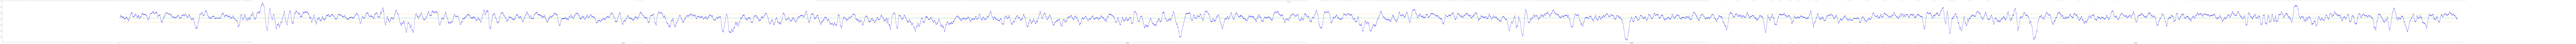

In [15]:
width, height = 600, 10
plt.rcParams['figure.figsize'] = [width, height]

plt.plot(x, y, color="blue")
plt.plot(x, z, '-g')  # solid green
plt.plot(x, l_up, color="orange")
plt.plot(x, l_down, color="orange")

plt.legend(["GC",], loc="upper center")
